### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

### Import Datasets

In [2]:
df = pd.read_csv('combined.csv')

### Label Encoding and Train-Test Split

In [3]:
# Label encoding
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'].cat.codes, df['street']))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'].cat.codes, df['propertyType']))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'].cat.codes, df['floor_range']))
df['floor_range'] = df['floor_range'].cat.codes

In [4]:
# Train-Test split
x = df.loc[:, df.columns != 'price']
y = df['price']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2019)

### Summary of Results
*Goal: Low RMSE, Low MAE, R2 close to 1, High Adjusted R2*, Low MAPE, Low SMAPE
    
Conclusions:
1. Random Forest better performance
2. For both models, using Grid Search/Randomized Search enabled us to get a better model performance
3. In terms of decision tree, using the default parameters resulted in severe overfitting as testing errors >>>> training errors
4. In terms of random forest, its performance with the default parameters is decent, but randomized search enabled us to lower the error metrics and hence achieve a better model performance

Results:
1. Default Decision Tree (Severe overfitting)
    - training mse: 6.082366888803413e-24, testing mse: 360627693496.7619
    - training rmse: 2.466245504568313e-12, testing rmse: 600522.8501037757
    - training mae: 1.3061783434841964e-14, testing mae: 81158.28305490923
    - training R2: 1.0, testing R2: 0.8549725068491869
    - training adjusted R2: 1.0, testing adjusted R2: 0.85489109780805
    - training mape: 4.610041212297163e-19, testing mape: 6.428137761094989
    - training smape: 4.610041212297164e-19, testing smape: 6.357251387703128
2. Decision Tree with Grid Search 
    - training mse: 60489971253.36636, testing mse: 295374555346.3646
    - training rmse: 245947.0903535278, testing rmse: 543483.7213260068
    - training mae: 30184.972962471213, testing mae: 80493.61113484786
    - training R2: 0.97762481319264, testing R2: 0.8812142492800431
    - training adjusted R2: 0.9776216746069242, testing adjusted R2: 0.8811475706534134
    - training mape: 2.3336746984936414, testing mape: 6.22149167077775
    - training smape: 2.321309898951737, testing smape: 6.1367893551796575
3. Default Random Forest 
    - training mse: 54542677589.470116, testing mse: 206312949607.0838
    - training rmse: 233543.7380652072, testing rmse: 454216.8530636923
    - training mae: 29782.386189439912, testing mae: 72213.88505641282
    - training R2: 0.9798247118530399, testing R2: 0.9170306373425144
    - training adjusted R2: 0.9776216746069242, testing adjusted R2: 0.8811475706534134
    - training mape: 2.1533451604006517, testing mape: 5.393986276089295
    - training smape: 2.1260160081254167, testing smape: 5.291131417876595
4. Random Forest with Randomized Search
    - training mse: 29029825348.23309, testing mse: 144509520535.60135
    - training rmse: 170381.4113928896, testing rmse: 380144.0786538722
    - training mae: 25520.749369346002, testing mae: 67943.82099318723
    - training R2: 0.9892618933073869, testing R2: 0.9418850690680737
    - training adjusted R2: 0.9892603870643968, testing adjusted R2: 0.9418524471099875
    - training mape: 1.9053695638290644, testing mape: 5.105269556830453
    - training smape: 1.879631185362374, testing smape: 5.00867260509507

### Define function for MAPE and sMAPE

In [5]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)

### Decision Tree

#### (a) Basic Decision Tree with Default Parameters

[352000. 355000. 370000. ... 443000. 700000. 300000.]
training mse: 6.082366888803413e-24, testing mse: 360627693496.7619
training rmse: 2.466245504568313e-12, testing rmse: 600522.8501037757
training mae: 1.3061783434841964e-14, testing mae: 81158.28305490923
training R2: 1.0, testing R2: 0.8549725068491869
training adjusted R2: 1.0, testing adjusted R2: 0.85489109780805
training mape: 4.610041212297163e-19, testing mape: 6.428137761094989
training smape: 4.610041212297164e-19, testing smape: 6.357251387703128


Text(0.5, 1.0, 'Residual plot')

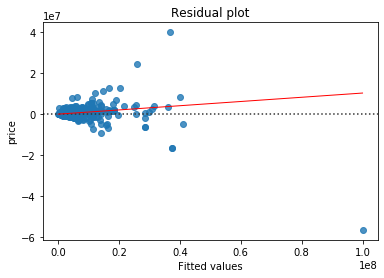

In [6]:
# train model
dt = tree.DecisionTreeRegressor()
dt.fit(x_train,y_train)

# make predictions on test set
y_pred_train = dt.predict(x_train)
y_pred = dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-dt.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-dt.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
sns.residplot(dt.predict(x_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

#### (b) Decision Tree using Best Estimators from Grid Search
- did 2 tests to kinda see which one better

In [7]:
params = {'min_samples_split': [7,12,15,20,25]}
gsearch_dt = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), 
                          params, 
                          scoring = 'r2',
                          verbose=1, 
                          cv=3, 
                          n_jobs=-1)
gsearch_dt.fit(x_train, y_train)
print('best score:', gsearch_dt.best_score_)
print('best parameters: ', gsearch_dt.best_params_)
print('best estimators: ', gsearch_dt.best_estimator_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.1s finished


best score: 0.8849345872586024
best parameters:  {'min_samples_split': 7}
best estimators:  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')


[369000.         364833.33333333 369000.         ... 420000.
 730000.         330148.        ]
training mse: 60489971253.36636, testing mse: 295374555346.3646
training rmse: 245947.0903535278, testing rmse: 543483.7213260068
training mae: 30184.972962471213, testing mae: 80493.61113484786
training R2: 0.97762481319264, testing R2: 0.8812142492800431
training adjusted R2: 0.9776216746069242, testing adjusted R2: 0.8811475706534134
training mape: 2.3336746984936414, testing mape: 6.22149167077775
training smape: 2.321309898951737, testing smape: 6.1367893551796575


Text(0.5, 1.0, 'Residual plot')

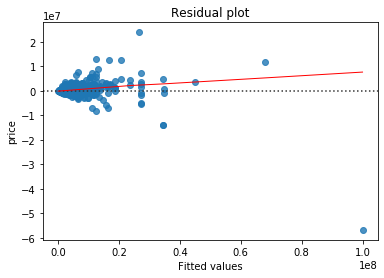

In [8]:
# make predictions on test set
y_pred_train = gsearch_dt.predict(x_train)
y_pred = gsearch_dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-gsearch_dt.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-gsearch_dt.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
sns.residplot(gsearch_dt.predict(x_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

### Random Forest

#### (a) Basic Random Forest with Default Parameters

/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[346900. 357250. 355300. ... 435000. 712000. 321500.]
training mse: 54542677589.470116, testing mse: 206312949607.0838
training rmse: 233543.7380652072, testing rmse: 454216.8530636923
training mae: 29782.386189439912, testing mae: 72213.88505641282
training R2: 0.9798247118530399, testing R2: 0.9170306373425144
training adjusted R2: 0.9776216746069242, testing adjusted R2: 0.8811475706534134
training mape: 2.1533451604006517, testing mape: 5.393986276089295
training smape: 2.1260160081254167, testing smape: 5.291131417876595


Text(0.5, 1.0, 'Residual plot')

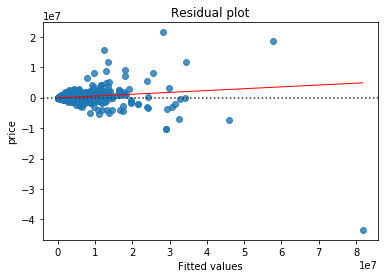

In [9]:
# train model
rforest = ensemble.RandomForestRegressor()
rforest.fit(x_train,y_train)

# make predictions on test set
y_pred_train = rforest.predict(x_train)
y_pred = rforest.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-gsearch_dt.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-gsearch_dt.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
sns.residplot(rforest.predict(x_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

In [10]:
rforest.get_params(deep=True)

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### (b) Random Forest using Best Estimators from Grid Search
- did 2 tests to kinda see which one better

In [11]:
params = {'n_estimators': [100,150,200,250]}
random_search_cv = RandomizedSearchCV(ensemble.RandomForestRegressor(random_state=42), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=5,
                              n_jobs = -1)
random_search_cv.fit(x_train, y_train)
print('best score:', random_search_cv.best_score_)
print('best parameters: ', random_search_cv.best_params_)
print('best estimators: ', random_search_cv.best_estimator_)

/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 15.5min finished


best score: 0.9230316449642771
best parameters:  {'n_estimators': 250}
best estimators:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


[353062.208 353766.    358876.    ... 439831.264 723100.    321623.52 ]
training mse: 29029825348.23309, testing mse: 144509520535.60135
training rmse: 170381.4113928896, testing rmse: 380144.0786538722
training mae: 25520.749369346002, testing mae: 67943.82099318723
training R2: 0.9892618933073869, testing R2: 0.9418850690680737
training adjusted R2: 0.9892603870643968, testing adjusted R2: 0.9418524471099875
training mape: 1.9053695638290644, testing mape: 5.105269556830453
training smape: 1.879631185362374, testing smape: 5.00867260509507


Text(0.5, 1.0, 'Residual plot')

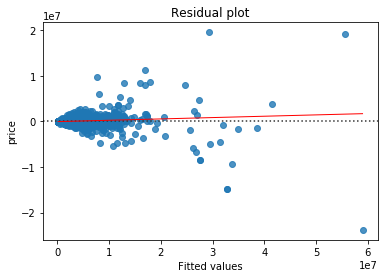

In [12]:
# make predictions on test set
y_pred_train = random_search_cv.predict(x_train)
y_pred = random_search_cv.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-random_search_cv.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-random_search_cv.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
sns.residplot(random_search_cv.predict(x_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

In [13]:
random_search_cv.get_params(deep=True)

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob